In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# gdrive
df = pd.read_excel("/content/drive/MyDrive/wave_samples.xlsx")

In [ ]:
df.tail()

,frame,id,x1,y1,x2,y2,class,sample_id,vid_name,xc,yc,label
1275,1305,0,811,198,898,292,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,854.5,245.0,1
1276,1306,0,808,202,895,295,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,851.5,248.5,1
1277,1307,0,801,205,890,302,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,845.5,253.5,1
1278,1308,0,794,208,883,305,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,838.5,256.5,1
1279,1309,0,792,209,882,307,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,837.0,258.0,1


In [ ]:
print(np.unique(df.sample_id.values))
print(len(np.unique(df.sample_id.values)))

[6968 6971 7041 7389 7856 8185 8207 8228 8284 8302 8335 8368 8389 8417
 8443 8561 8661 8724 8729 8737]
20


In [ ]:
df[df.sample_id==7041   ]

,frame,id,x1,y1,x2,y2,class,sample_id,vid_name,xc,yc,label
768,768,4,600,123,727,270,1,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,663.5,196.5,0
769,769,4,634,105,760,251,1,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,697.0,178.0,0
770,770,4,658,90,785,236,1,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,721.5,163.0,0
771,771,4,669,77,799,224,1,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,734.0,150.5,0
772,772,4,663,68,798,220,1,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,730.5,144.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
827,827,4,794,165,854,259,2,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,824.0,212.0,0
828,828,4,810,161,871,257,2,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,840.5,209.0,0
829,829,4,826,159,886,255,2,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,856.0,207.0,0
830,830,4,840,155,901,252,2,7041,gm_[R1S]_01_24_2024_13H_06M_13S_front,870.5,203.5,0


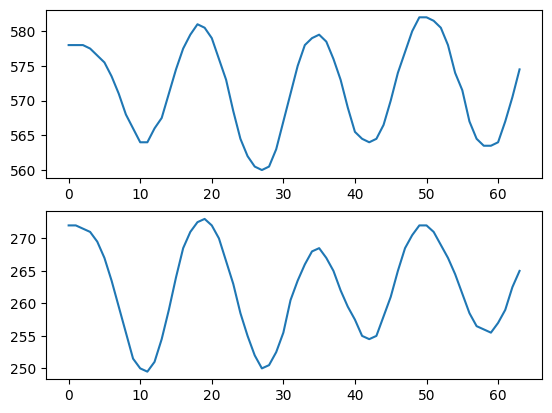

In [ ]:
sample_id = 6968
xc = df.xc[df.sample_id==sample_id].values
yc = df.yc[df.sample_id==sample_id].values

plt.subplot(211)
plt.plot(xc)
plt.subplot(212)
plt.plot(yc)

# note that here the values are not around "zero" -> commonly we want this.

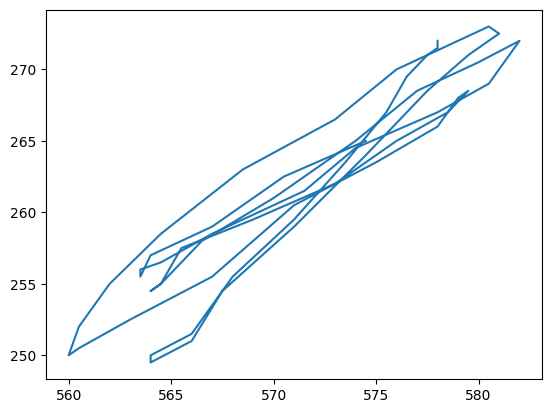

In [ ]:
plt.plot(xc, yc)

In [ ]:
mean_xc = np.mean(xc)
mean_yc = np.mean(yc)

In [ ]:
from scipy.signal import butter, filtfilt

# Function to apply high-pass filter
def highpass_filter(signal, cutoff_frequency, sampling_rate):
    # Design a Butterworth high-pass filter
    order = 4  # Filter order
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')

    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, signal)

    return filtered_signal

# High-pass filter parameters
cutoff_frequency = 0.1  # Adjust as needed
sampling_rate = 30  # Adjust to your actual sampling rate


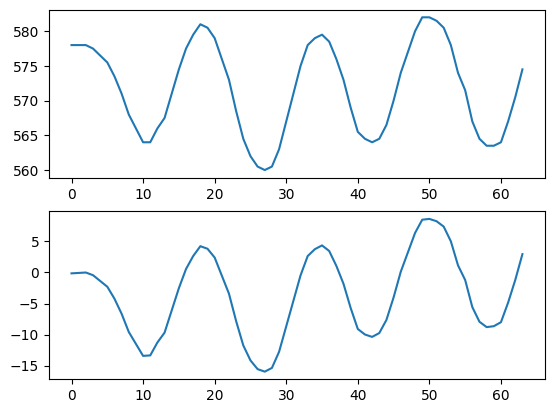

In [ ]:
xc_filt = highpass_filter(xc, cutoff_frequency=cutoff_frequency, sampling_rate=sampling_rate)
plt.subplot(211)
plt.plot(xc)
plt.subplot(212)
plt.plot(xc_filt)


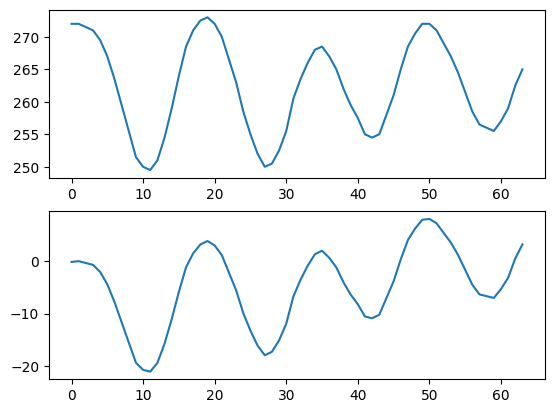

In [ ]:
yc_filt = highpass_filter(yc, cutoff_frequency=cutoff_frequency, sampling_rate=sampling_rate)
plt.subplot(211)
plt.plot(yc)
plt.subplot(212)
plt.plot(yc_filt)


In [ ]:
waves = df[df.label == 1]
print(waves.shape)
non_waves = df[df.label == 0]
print(non_waves.shape)

waves

(640, 12)
(640, 12)


,frame,id,x1,y1,x2,y2,class,sample_id,vid_name,xc,yc,label
0,368,0,541,229,615,315,1,6968,gm_12_25_2023_13H_32M_48S_front,578.0,272.0,1
1,369,0,541,229,615,315,1,6968,gm_12_25_2023_13H_32M_48S_front,578.0,272.0,1
2,370,0,542,229,614,314,1,6968,gm_12_25_2023_13H_32M_48S_front,578.0,271.5,1
3,371,0,541,228,614,314,1,6968,gm_12_25_2023_13H_32M_48S_front,577.5,271.0,1
4,372,0,540,227,613,312,1,6968,gm_12_25_2023_13H_32M_48S_front,576.5,269.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1305,0,811,198,898,292,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,854.5,245.0,1
1276,1306,0,808,202,895,295,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,851.5,248.5,1
1277,1307,0,801,205,890,302,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,845.5,253.5,1
1278,1308,0,794,208,883,305,1,7856,gm_[R1S]_01_25_2024_16H_18M_03S_front,838.5,256.5,1


In [ ]:
from scipy.fft import fft, fftfreq
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.signal import correlate



def calculate_features(signal1, signal2, features, sampling_rate=30, cutoff_frequency=0.1):
    # Amplitude-related features for signal1
    max_amplitude_XC = np.max(signal1)
    min_amplitude_XC = np.min(signal1)
    avg_amplitude_XC = np.mean(signal1)
    rms_amplitude_XC = np.sqrt(np.mean(signal1**2))

    # Amplitude-related features for signal2
    max_amplitude_YC = np.max(signal2)
    min_amplitude_YC = np.min(signal2)
    avg_amplitude_YC = np.mean(signal2)
    rms_amplitude_YC = np.sqrt(np.mean(signal2**2))

    # Temporal features for signal1
    rise_time_XC = 0.1 * (np.argmax(signal1 > 0.1 * max_amplitude_XC) - np.argmax(signal1 > 0.9 * max_amplitude_XC)) / sampling_rate
    fall_time_XC = 0.1 * (np.argmax(signal1 > 0.9 * max_amplitude_XC) - np.argmax(signal1 > 0.1 * max_amplitude_XC)) / sampling_rate
    peak_to_peak_time_XC = (np.argmax(signal1 > 0.9 * max_amplitude_XC) - np.argmax(signal1 > 0.1 * max_amplitude_XC)) / sampling_rate

    # Temporal features for signal2
    rise_time_YC = 0.1 * (np.argmax(signal2 > 0.1 * max_amplitude_YC) - np.argmax(signal2 > 0.9 * max_amplitude_YC)) / sampling_rate
    fall_time_YC = 0.1 * (np.argmax(signal2 > 0.9 * max_amplitude_YC) - np.argmax(signal2 > 0.1 * max_amplitude_YC)) / sampling_rate
    peak_to_peak_time_YC = (np.argmax(signal2 > 0.9 * max_amplitude_YC) - np.argmax(signal2 > 0.1 * max_amplitude_YC)) / sampling_rate

    # Nonlinear features for signal1
    signal_kurtosis_XC = kurtosis(signal1)
    signal_skewness_XC = skew(signal1)

    # Nonlinear features for signal2
    signal_kurtosis_YC = kurtosis(signal2)
    signal_skewness_YC = skew(signal2)

    # Zero-crossing features with filtered signal for signal1
    filtered_signal_XC = highpass_filter(signal1, cutoff_frequency=cutoff_frequency, sampling_rate=sampling_rate)
    zero_crossing_rate_XC = np.sum(np.diff(np.sign(filtered_signal_XC)) != 0) / (2 * len(filtered_signal_XC) / sampling_rate)

    # Zero-crossing features with filtered signal for signal2
    filtered_signal_YC = highpass_filter(signal2, cutoff_frequency=cutoff_frequency, sampling_rate=sampling_rate)
    zero_crossing_rate_YC = np.sum(np.diff(np.sign(filtered_signal_YC)) != 0) / (2 * len(filtered_signal_YC) / sampling_rate)

    # FFT for signal1
    fft_signal_XC = fft(signal1.values)
    fft3_XC = np.abs(fft_signal_XC[2])

    # FFT for signal2
    fft_signal_YC = fft(signal2.values)
    fft3_YC = np.abs(fft_signal_YC[2])

    # Peaks for signal1
    peaks_XC, _ = find_peaks(signal1)
    num_peaks_XC = len(peaks_XC)

    # Peaks for signal2
    peaks_YC, _ = find_peaks(signal2)
    num_peaks_YC = len(peaks_YC)

    # Cross-correlation between signal1 and signal2
    cross_corr = correlate(signal1, signal2, mode='full')
    max_cross_corr = np.max(cross_corr)
    min_cross_corr = np.min(cross_corr)
    avg_cross_corr = np.mean(cross_corr)

    angles = np.arctan(np.gradient(signal1))
    angle_variability_XC = np.std(angles)

    angles = np.arctan(np.gradient(signal2))
    angle_variability_YC = np.std(angles)

    features.append({
        #'max_amplitude_XC': max_amplitude_XC,
        #'min_amplitude_XC': min_amplitude_XC,
        #'avg_amplitude_XC': avg_amplitude_XC,
        #'rms_amplitude_XC': rms_amplitude_XC,
        'rise_time_XC': rise_time_XC,
        'fall_time_XC': fall_time_XC,
        'peak_to_peak_time_XC': peak_to_peak_time_XC,
        #'signal_kurtosis_XC': signal_kurtosis_XC,
        #'signal_skewness_XC': signal_skewness_XC,
        'zero_crossing_rate_XC': zero_crossing_rate_XC,
        'fft3_XC': fft3_XC,
        'num_peaks_XC': num_peaks_XC,
        #'max_amplitude_YC': max_amplitude_YC,
        #'min_amplitude_YC': min_amplitude_YC,
        #'avg_amplitude_YC': avg_amplitude_YC,
        #'rms_amplitude_YC': rms_amplitude_YC,
        'rise_time_YC': rise_time_YC,
        'fall_time_YC': fall_time_YC,
        'peak_to_peak_time_YC': peak_to_peak_time_YC,
        #'signal_kurtosis_YC': signal_kurtosis_YC,
        #'signal_skewness_YC': signal_skewness_YC,
        'zero_crossing_rate_YC': zero_crossing_rate_YC,
        'fft3_YC': fft3_YC,
        'num_peaks_YC': num_peaks_YC,
        # 'dominant_freq_XC': dominant_freq_XC,
        # 'dominant_freq_YC': dominant_freq_YC,
        # 'period_length_XC': period_length_XC,
        # 'period_length_YC': period_length_YC,
        # 'autocorr_peaks_XC': autocorr_peaks_XC,
        # 'autocorr_peaks_YC': autocorr_peaks_YC,
        'angle_variability_XC': angle_variability_XC,
        #'slope_variability_XC': slope_variability_XC,
        #'angle_variability_YC': angle_variability_YC
        #'slope_variability_YC': slope_variability_YC,


    })


In [ ]:
wave_features = []
non_wave_features = []


# wave features
for sample_id, wave in waves.groupby('sample_id'):
  calculate_features(wave.xc ,wave.yc, wave_features)

# non-wave features
for sample_id, non_wave in non_waves.groupby('sample_id'):
  calculate_features(non_wave.xc, non_wave.yc, non_wave_features)


In [ ]:
print(f'Number of wave samples: {len(wave_features)} with number of features: {len(wave_features[0])}')
print(f'Number of non-wave samples: {len(non_wave_features)} with number of features: {len(non_wave_features[0])}')

Number of wave samples: 10 with number of features: 13
Number of non-wave samples: 10 with number of features: 13


In [ ]:
def plot_features(wave_feature, non_wave_feature, title):
  # boxplots
  plt.boxplot([wave_feature, non_wave_feature], labels=['Waves', 'Non-Waves'])
  plt.title(title)
  plt.ylabel('Value')
  plt.xlabel('Categories')
  plt.show()

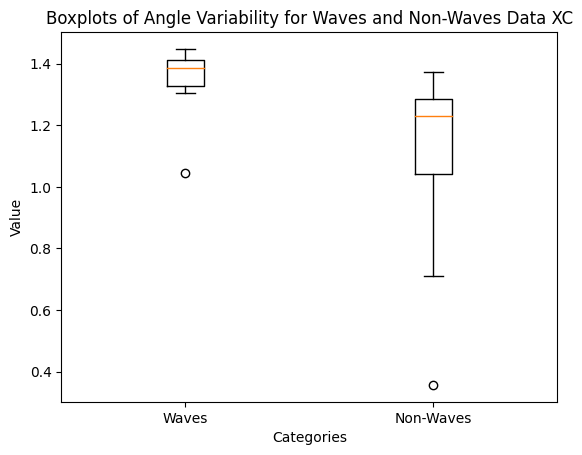

In [ ]:
# For XC angle variability
waves_angle_variability_XC = [sample['angle_variability_XC'] for sample in wave_features]
non_waves_angle_variability_XC = [sample['angle_variability_XC'] for sample in non_wave_features]
title_xc_angle_variability = 'Boxplots of Angle Variability for Waves and Non-Waves Data XC'
plot_features(waves_angle_variability_XC, non_waves_angle_variability_XC, title_xc_angle_variability)

# For YC angle variability
# waves_angle_variability_YC = [sample['angle_variability_YC'] for sample in wave_features]
# non_waves_angle_variability_YC = [sample['angle_variability_YC'] for sample in non_wave_features]
# title_yc_angle_variability = 'Boxplots of Angle Variability for Waves and Non-Waves Data YC'
# plot_features(waves_angle_variability_YC, non_waves_angle_variability_YC, title_yc_angle_variability)




In [ ]:
# waves_max_amplitude = [sample['max_amplitude_XC'] for sample in wave_features]
# non_waves_max_amplitude = [sample['max_amplitude_XC'] for sample in non_wave_features]

# title_xc = 'Boxplots of Max Amplitude for Waves and Non-Waves Data XC'
# plot_features(waves_max_amplitude, non_waves_max_amplitude, title_xc)

# waves_max_amplitude = [sample['max_amplitude_YC'] for sample in wave_features]
# non_waves_max_amplitude = [sample['max_amplitude_YC'] for sample in non_wave_features]

# title_yc = 'Boxplots of Max Amplitude for Waves and Non-Waves Data YC'
# plot_features(waves_max_amplitude, non_waves_max_amplitude, title_yc)


In [ ]:
# waves_min_amplitude = [sample['min_amplitude_XC'] for sample in wave_features]
# non_waves_min_amplitude = [sample['min_amplitude_XC'] for sample in non_wave_features]

# title_xc = 'Boxplots of Min Amplitude for Waves and Non-Waves Data XC'
# plot_features(waves_min_amplitude, non_waves_min_amplitude, title_xc)

# waves_min_amplitude = [sample['min_amplitude_YC'] for sample in wave_features]
# non_waves_min_amplitude = [sample['min_amplitude_YC'] for sample in non_wave_features]

# title_yc = 'Boxplots of Min Amplitude for Waves and Non-Waves Data YC'
# plot_features(waves_min_amplitude, non_waves_min_amplitude, title_yc)


In [ ]:
# waves_signal_skewness = [sample['signal_skewness_XC'] for sample in wave_features]
# non_waves_signal_skewness = [sample['signal_skewness_XC'] for sample in non_wave_features]

# title_xc = 'Boxplots of Signal Skewness for Waves and Non-Waves Data XC'
# plot_features(waves_signal_skewness, non_waves_signal_skewness, title_xc)

# waves_signal_skewness = [sample['signal_skewness_YC'] for sample in wave_features]
# non_waves_signal_skewness = [sample['signal_skewness_YC'] for sample in non_wave_features]

# title_yc = 'Boxplots of Signal Skewness for Waves and Non-Waves Data YC'
# plot_features(waves_signal_skewness, non_waves_signal_skewness, title_yc)


In [ ]:
# waves_avg_amplitude = [sample['avg_amplitude_XC'] for sample in wave_features]
# non_waves_avg_amplitude = [sample['avg_amplitude_XC'] for sample in non_wave_features]

# title_xc = 'Boxplots of Average Amplitude for Waves and Non-Waves Data XC'
# plot_features(waves_avg_amplitude, non_waves_avg_amplitude, title_xc)

# waves_avg_amplitude = [sample['avg_amplitude_YC'] for sample in wave_features]
# non_waves_avg_amplitude = [sample['avg_amplitude_YC'] for sample in non_wave_features]

# title_yc = 'Boxplots of Average Amplitude for Waves and Non-Waves Data YC'
# plot_features(waves_avg_amplitude, non_waves_avg_amplitude, title_yc)


In [ ]:
# waves_rms_amplitude = [sample['rms_amplitude_XC'] for sample in wave_features]
# non_waves_rms_amplitude = [sample['rms_amplitude_XC'] for sample in non_wave_features]

# title_xc = 'Boxplots of RMS Amplitude for Waves and Non-Waves Data XC'
# plot_features(waves_rms_amplitude, non_waves_rms_amplitude, title_xc)

# waves_rms_amplitude = [sample['rms_amplitude_YC'] for sample in wave_features]
# non_waves_rms_amplitude = [sample['rms_amplitude_YC'] for sample in non_wave_features]

# title_yc = 'Boxplots of RMS Amplitude for Waves and Non-Waves Data YC'
# plot_features(waves_rms_amplitude, non_waves_rms_amplitude, title_yc)


In [ ]:
# waves_signal_kurtosis = [sample['signal_kurtosis_XC'] for sample in wave_features]
# non_waves_signal_kurtosis = [sample['signal_kurtosis_XC'] for sample in non_wave_features]

# title_xc = 'Boxplots of Signal Kurtosis for Waves and Non-Waves Data XC'
# plot_features(waves_signal_kurtosis, non_waves_signal_kurtosis, title_xc)

# waves_signal_kurtosis = [sample['signal_kurtosis_YC'] for sample in wave_features]
# non_waves_signal_kurtosis = [sample['signal_kurtosis_YC'] for sample in non_wave_features]

# title_yc = 'Boxplots of Signal Kurtosis for Waves and Non-Waves Data YC'
# plot_features(waves_signal_kurtosis, non_waves_signal_kurtosis, title_yc)


In [ ]:
# min_autocorr_XC_waves = [sample['min_autocorr_XC'] for sample in wave_features]
# min_autocorr_XC_non_waves = [sample['min_autocorr_XC'] for sample in non_wave_features]

# title_min_autocorr_xc = 'Boxplots of Min Autocorrelation for Waves and Non-Waves Data XC'
# plot_features(min_autocorr_XC_waves, min_autocorr_XC_non_waves, title_min_autocorr_xc)

# min_autocorr_YC_waves = [sample['min_autocorr_YC'] for sample in wave_features]
# min_autocorr_YC_non_waves = [sample['min_autocorr_YC'] for sample in non_wave_features]

# title_min_autocorr_yc = 'Boxplots of Min Autocorrelation for Waves and Non-Waves Data YC'
# plot_features(min_autocorr_YC_waves, min_autocorr_YC_non_waves, title_min_autocorr_yc)

# avg_autocorr_XC_waves = [sample['avg_autocorr_XC'] for sample in wave_features]
# avg_autocorr_XC_non_waves = [sample['avg_autocorr_XC'] for sample in non_wave_features]

# title_avg_autocorr_xc = 'Boxplots of Avg Autocorrelation for Waves and Non-Waves Data XC'
# plot_features(avg_autocorr_XC_waves, avg_autocorr_XC_non_waves, title_avg_autocorr_xc)

# avg_autocorr_YC_waves = [sample['avg_autocorr_YC'] for sample in wave_features]
# avg_autocorr_YC_non_waves = [sample['avg_autocorr_YC'] for sample in non_wave_features]

# title_avg_autocorr_yc = 'Boxplots of Avg Autocorrelation for Waves and Non-Waves Data YC'
# plot_features(avg_autocorr_YC_waves, avg_autocorr_YC_non_waves, title_avg_autocorr_yc)


In [ ]:
# waves_max_cross_corr = [sample['max_cross_corr'] for sample in wave_features]
# non_waves_max_cross_corr = [sample['max_cross_corr'] for sample in non_wave_features]

# title_max_cross_corr = 'Boxplots of Max Cross-correlation for Waves and Non-Waves Data'
# plot_features(waves_max_cross_corr, non_waves_max_cross_corr, title_max_cross_corr)

# waves_min_cross_corr = [sample['min_cross_corr'] for sample in wave_features]
# non_waves_min_cross_corr = [sample['min_cross_corr'] for sample in non_wave_features]

# title_min_cross_corr = 'Boxplots of Min Cross-correlation for Waves and Non-Waves Data'
# plot_features(waves_min_cross_corr, non_waves_min_cross_corr, title_min_cross_corr)

# waves_avg_cross_corr = [sample['avg_cross_corr'] for sample in wave_features]
# non_waves_avg_cross_corr = [sample['avg_cross_corr'] for sample in non_wave_features]

# title_avg_cross_corr = 'Boxplots of Avg Cross-correlation for Waves and Non-Waves Data'
# plot_features(waves_avg_cross_corr, non_waves_avg_cross_corr, title_avg_cross_corr)


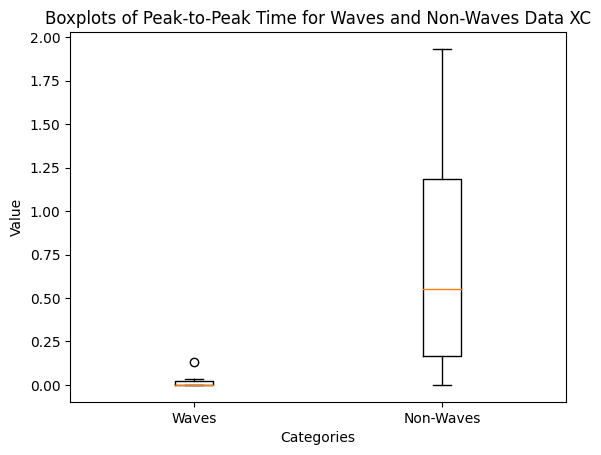

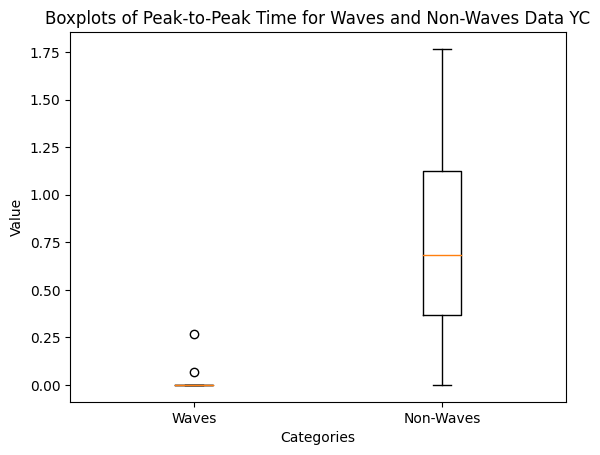

In [ ]:
waves_peak_to_peak_time = [sample['peak_to_peak_time_XC'] for sample in wave_features]
non_waves_peak_to_peak_time = [sample['peak_to_peak_time_XC'] for sample in non_wave_features]

title_xc = 'Boxplots of Peak-to-Peak Time for Waves and Non-Waves Data XC'
plot_features(waves_peak_to_peak_time, non_waves_peak_to_peak_time, title_xc)

waves_peak_to_peak_time = [sample['peak_to_peak_time_YC'] for sample in wave_features]
non_waves_peak_to_peak_time = [sample['peak_to_peak_time_YC'] for sample in non_wave_features]

title_yc = 'Boxplots of Peak-to-Peak Time for Waves and Non-Waves Data YC'
plot_features(waves_peak_to_peak_time, non_waves_peak_to_peak_time, title_yc)


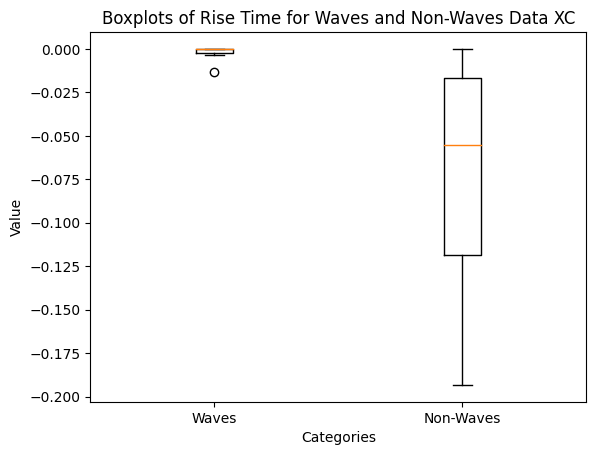

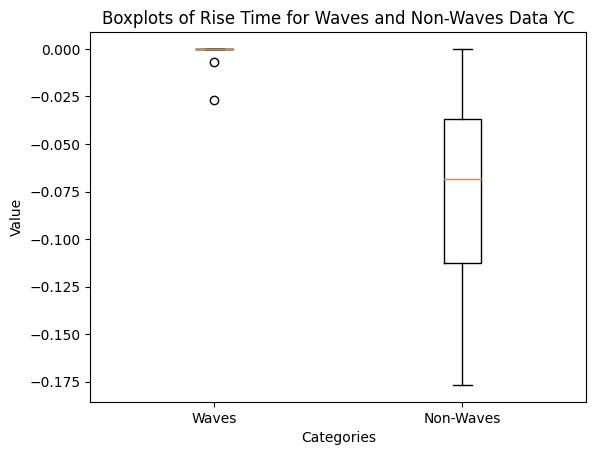

In [ ]:
waves_rise_time = [sample['rise_time_XC'] for sample in wave_features]
non_waves_rise_time = [sample['rise_time_XC'] for sample in non_wave_features]

title_xc = 'Boxplots of Rise Time for Waves and Non-Waves Data XC'
plot_features(waves_rise_time, non_waves_rise_time, title_xc)

waves_rise_time = [sample['rise_time_YC'] for sample in wave_features]
non_waves_rise_time = [sample['rise_time_YC'] for sample in non_wave_features]

title_yc = 'Boxplots of Rise Time for Waves and Non-Waves Data YC'
plot_features(waves_rise_time, non_waves_rise_time, title_yc)


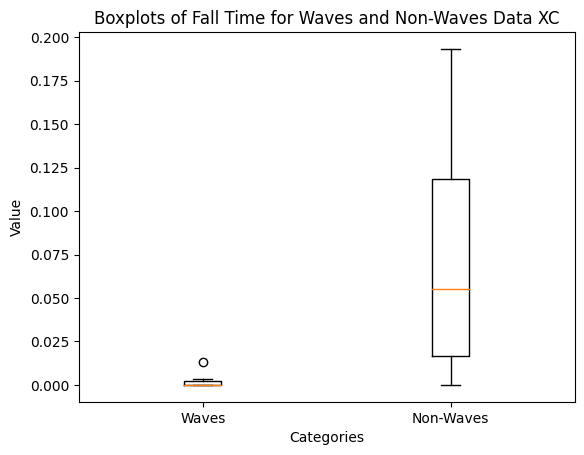

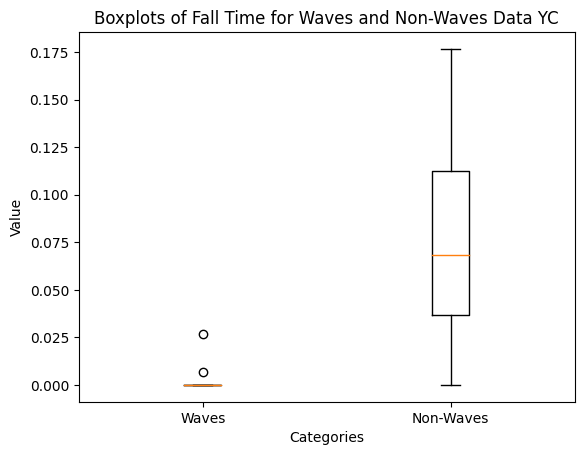

In [ ]:
waves_fall_time = [sample['fall_time_XC'] for sample in wave_features]
non_waves_fall_time = [sample['fall_time_XC'] for sample in non_wave_features]

title_xc = 'Boxplots of Fall Time for Waves and Non-Waves Data XC'
plot_features(waves_fall_time, non_waves_fall_time, title_xc)

waves_fall_time = [sample['fall_time_YC'] for sample in wave_features]
non_waves_fall_time = [sample['fall_time_YC'] for sample in non_wave_features]

title_yc = 'Boxplots of Fall Time for Waves and Non-Waves Data YC'
plot_features(waves_fall_time, non_waves_fall_time, title_yc)


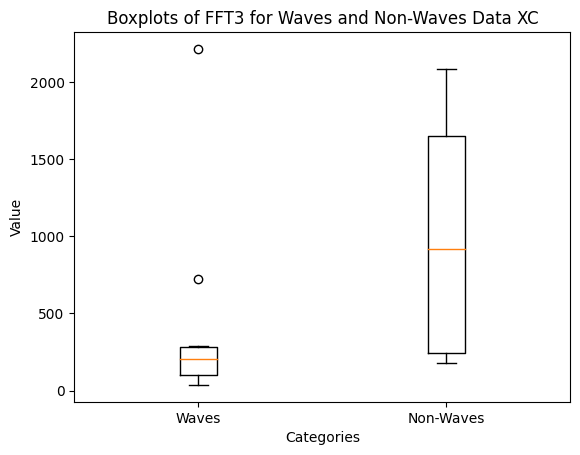

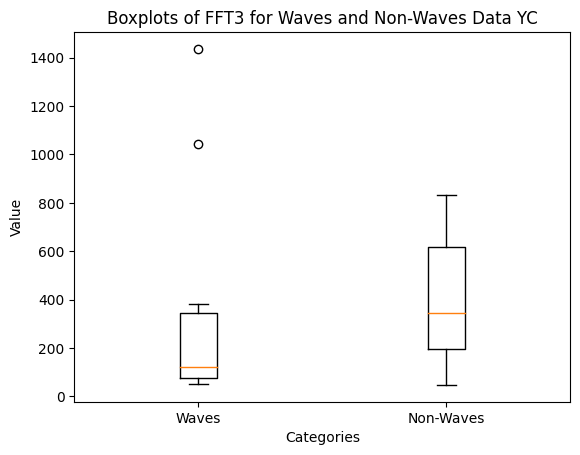

In [ ]:
waves_fft3 = [sample['fft3_XC'] for sample in wave_features]
non_waves_fft3 = [sample['fft3_XC'] for sample in non_wave_features]

title_xc = 'Boxplots of FFT3 for Waves and Non-Waves Data XC'
plot_features(waves_fft3, non_waves_fft3, title_xc)

waves_fft3 = [sample['fft3_YC'] for sample in wave_features]
non_waves_fft3 = [sample['fft3_YC'] for sample in non_wave_features]

title_yc = 'Boxplots of FFT3 for Waves and Non-Waves Data YC'
plot_features(waves_fft3, non_waves_fft3, title_yc)


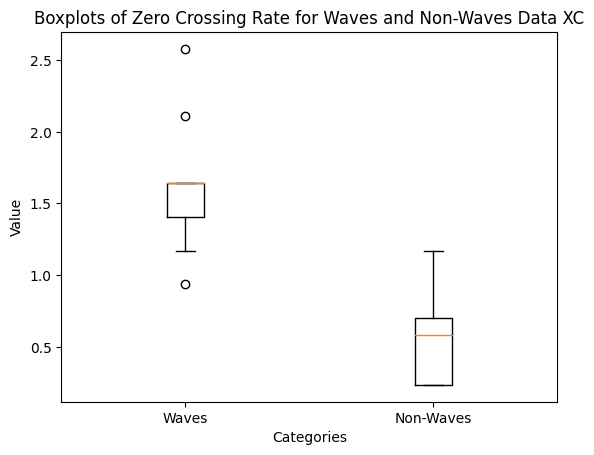

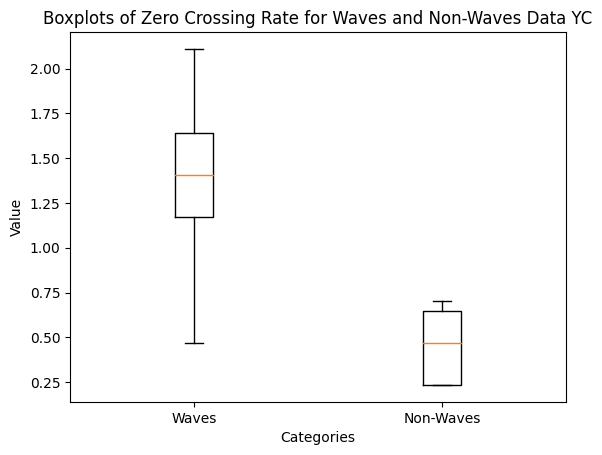

In [ ]:
waves_zero_crossing_rate = [sample['zero_crossing_rate_XC'] for sample in wave_features]
non_waves_zero_crossing_rate = [sample['zero_crossing_rate_XC'] for sample in non_wave_features]

title_xc = 'Boxplots of Zero Crossing Rate for Waves and Non-Waves Data XC'
plot_features(waves_zero_crossing_rate, non_waves_zero_crossing_rate, title_xc)

waves_zero_crossing_rate = [sample['zero_crossing_rate_YC'] for sample in wave_features]
non_waves_zero_crossing_rate = [sample['zero_crossing_rate_YC'] for sample in non_wave_features]

title_yc = 'Boxplots of Zero Crossing Rate for Waves and Non-Waves Data YC'
plot_features(waves_zero_crossing_rate, non_waves_zero_crossing_rate, title_yc)


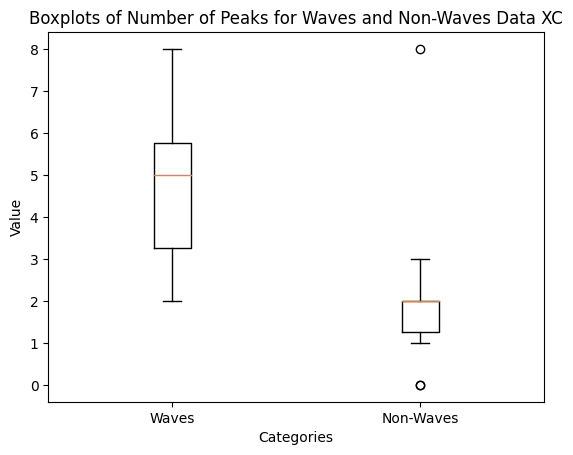

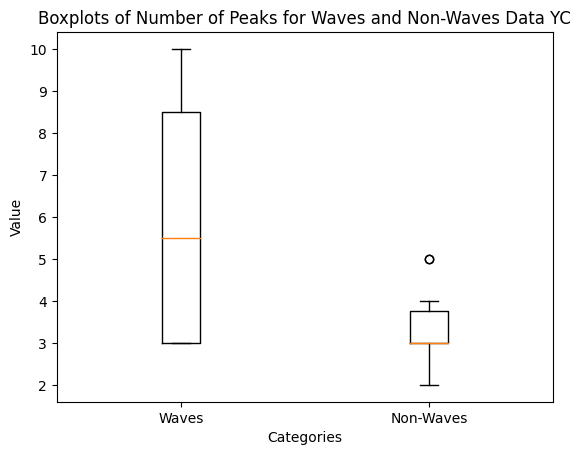

In [ ]:
waves_num_peaks = [sample['num_peaks_XC'] for sample in wave_features]
non_waves_num_peaks = [sample['num_peaks_XC'] for sample in non_wave_features]

title_xc = 'Boxplots of Number of Peaks for Waves and Non-Waves Data XC'
plot_features(waves_num_peaks, non_waves_num_peaks, title_xc)

waves_num_peaks = [sample['num_peaks_YC'] for sample in wave_features]
non_waves_num_peaks = [sample['num_peaks_YC'] for sample in non_wave_features]

title_yc = 'Boxplots of Number of Peaks for Waves and Non-Waves Data YC'
plot_features(waves_num_peaks, non_waves_num_peaks, title_yc)


In [ ]:
# Create X and y from wave features
X, y = [], []
for sample in wave_features:
    X.append(list(sample.values()))
    y.append(1)

for sample in non_wave_features:
    X.append(list(sample.values()))
    y.append(0)

# len(X) and len(y) are 20

print(X)


[[0.0, 0.0, 0.0, 1.640625, 56.40252821253095, 3, 0.0, 0.0, 0.0, 1.640625, 49.401543801328906, 3, 1.0446015450998987], [-0.013333333333333334, 0.013333333333333334, 0.13333333333333333, 1.640625, 726.4110633937162, 3, -0.02666666666666667, 0.02666666666666667, 0.26666666666666666, 1.171875, 1435.792595375297, 3, 1.3953785626146018], [0.0, 0.0, 0.0, 1.640625, 125.30839076254469, 6, 0.0, 0.0, 0.0, 2.109375, 92.31524270712478, 5, 1.310548912781395], [0.0, 0.0, 0.0, 1.171875, 36.76291286248299, 5, 0.0, 0.0, 0.0, 1.171875, 69.88673201363184, 9, 1.4130485702478242], [-0.0033333333333333335, 0.0033333333333333335, 0.03333333333333333, 1.640625, 157.9359391162192, 5, 0.0, 0.0, 0.0, 0.46875, 234.88914902069817, 7, 1.4251364134564897], [-0.0033333333333333335, 0.0033333333333333335, 0.03333333333333333, 1.40625, 254.41813480999173, 5, 0.0, 0.0, 0.0, 1.640625, 62.438373418908775, 9, 1.448122728664391], [0.0, 0.0, 0.0, 2.578125, 287.5321162079818, 6, 0.0, 0.0, 0.0, 1.640625, 88.67623134235394, 10, 

In [ ]:
# from xgboost import XGBClassifier

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print(f'Train samples: {len(X_train)}, test samples: {len(X_test)}')

# # Define and train the XGBoost model
# model = XGBClassifier()
# model.fit(X_train, y_train)

# # Evaluate the model
# accuracy = model.score(X_test, y_test)
# print(f"Model Accuracy: {accuracy:.2f}")


In [ ]:
X_test

[[0.0,
  0.0,
  0.0,
  1.640625,
  56.40252821253095,
  3,
  0.0,
  0.0,
  0.0,
  1.640625,
  49.401543801328906,
  3,
  1.0446015450998987],
 [-0.04000000000000001,
  0.04000000000000001,
  0.4,
  0.234375,
  1666.1024788989087,
  2,
  -0.05666666666666667,
  0.05666666666666667,
  0.5666666666666667,
  0.46875,
  830.7238067053188,
  5,
  1.372627194313946],
 [-0.07,
  0.07,
  0.7,
  0.234375,
  1300.3013087126144,
  3,
  -0.08000000000000002,
  0.08000000000000002,
  0.8,
  0.703125,
  549.923517137211,
  3,
  1.276308425329022],
 [-0.013333333333333334,
  0.013333333333333334,
  0.13333333333333333,
  1.640625,
  726.4110633937162,
  3,
  -0.02666666666666667,
  0.02666666666666667,
  0.26666666666666666,
  1.171875,
  1435.792595375297,
  3,
  1.3953785626146018],
 [0.0,
  0.0,
  0.0,
  1.40625,
  96.04922592136518,
  4,
  0.0,
  0.0,
  0.0,
  1.171875,
  148.53246145114903,
  3,
  1.379222556723653],
 [-0.0033333333333333335,
  0.0033333333333333335,
  0.03333333333333333,
  1.40

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1 1]
 [1 3]]


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.75      0.75      0.75         4

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:")
print(scores)
print("Mean CV Score:", scores.mean())


Cross-Validation Scores:
[0.25 0.75 1.   0.75 1.  ]
Mean CV Score: 0.75


In [ ]:
# Lets try the model for a random .xlsx

In [ ]:
ls

drive/  sample_data/


In [ ]:
test_signal = pd.read_excel("drive/MyDrive/hand detector/vids/office/nonwave10_SORT.xlsx")


In [ ]:
test_signal['xc'] = (test_signal['x1'] + test_signal['x2']) / 2
test_signal['yc'] = (test_signal['y1'] + test_signal['y2']) / 2
test_signal

,frame,id,x1,y1,x2,y2,xc,yc
0,1,1358,662,289,824,457,743.0,373.0
1,2,1358,653,288,814,456,733.5,372.0
2,3,1358,646,286,801,451,723.5,368.5
3,5,1358,623,282,783,450,703.0,366.0
4,6,1358,616,282,775,450,695.5,366.0
...,...,...,...,...,...,...,...,...
248,263,1360,338,330,470,461,404.0,395.5
249,264,1360,339,331,469,461,404.0,396.0
250,265,1360,339,332,468,461,403.5,396.5
251,266,1360,341,332,469,461,405.0,396.5


In [ ]:
# Assuming your DataFrame is named test_signal
#filtered_df = test_signal[(test_signal['id'] != -1) & (test_signal['x'] != -1) & (test_signal['yc'] != -1)]


# FIXXXXXXXXXXX

wave_features = []

for sample_id, wave in test_signal.groupby('id'):
    print(wave.xc)
    calculate_features(wave.xc, wave.yc, wave_features)

    # Create X and y from wave features
X = []
for sample in wave_features:
    X.append(list(sample.values()))



0      743.0
1      733.5
2      723.5
3      703.0
4      695.5
       ...  
216    411.0
217    410.0
218    410.5
219    409.0
220    406.5
Name: xc, Length: 221, dtype: float64
221    410.0
222    410.0
223    408.5
224    409.0
225    409.0
226    408.5
227    406.5
228    405.5
229    405.5
230    405.5
231    406.5
232    406.5
233    406.5
234    406.5
235    406.5
236    406.0
237    405.5
238    405.5
239    405.5
240    405.0
241    403.5
242    404.0
243    405.0
244    405.0
245    404.5
246    404.5
247    404.5
248    404.0
249    404.0
250    403.5
251    405.0
252    403.5
Name: xc, dtype: float64


In [ ]:
wave_features

[{'rise_time_XC': -0.41333333333333333,
  'fall_time_XC': 0.41333333333333333,
  'peak_to_peak_time_XC': 4.133333333333334,
  'zero_crossing_rate_XC': 0.20361990950226244,
  'fft3_XC': 9277.122735397783,
  'num_peaks_XC': 11,
  'rise_time_YC': -0.27666666666666667,
  'fall_time_YC': 0.27666666666666667,
  'peak_to_peak_time_YC': 2.7666666666666666,
  'zero_crossing_rate_YC': 0.20361990950226244,
  'fft3_YC': 4615.122278910979,
  'num_peaks_YC': 23,
  'angle_variability_XC': 1.1430147594300915},
 {'rise_time_XC': 0.0,
  'fall_time_XC': 0.0,
  'peak_to_peak_time_XC': 0.0,
  'zero_crossing_rate_XC': 2.34375,
  'fft3_XC': 17.192243090903098,
  'num_peaks_XC': 4,
  'rise_time_YC': 0.0,
  'fall_time_YC': 0.0,
  'peak_to_peak_time_YC': 0.0,
  'zero_crossing_rate_YC': 0.9375,
  'fft3_YC': 18.39412309761817,
  'num_peaks_YC': 6,
  'angle_variability_XC': 0.415226297596973}]

In [ ]:
X

[[-0.41333333333333333,
  0.41333333333333333,
  4.133333333333334,
  0.20361990950226244,
  9277.122735397783,
  11,
  -0.27666666666666667,
  0.27666666666666667,
  2.7666666666666666,
  0.20361990950226244,
  4615.122278910979,
  23,
  1.1430147594300915],
 [0.0,
  0.0,
  0.0,
  2.34375,
  17.192243090903098,
  4,
  0.0,
  0.0,
  0.0,
  0.9375,
  18.39412309761817,
  6,
  0.415226297596973]]

In [ ]:
# my_X_test = [[data_dict[key] for key in data_dict] for data_dict in X]
# print(my_X_test)

In [ ]:
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)
print(y_pred_proba)
y_pred

[[0.8 0.2]
 [0.2 0.8]]


array([0, 1])